In [16]:
#Avoid warning
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
datapath= r'C:\Users\medai\Desktop\Review Paper\Link Quality\Lowrance - Datasets\LinkQualityTPR.xlsx'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel(datapath)
data.head()
data.describe()
print (data['Area'].unique())
print(data.groupby('Area').size())
data.describe()

['ParkLOS' 'ParkNLOS' 'TrackLOS' 'TrackNLOS' 'RESIDENTIAL_OD']
Area
ParkLOS           415
ParkNLOS          377
RESIDENTIAL_OD    399
TrackLOS          417
TrackNLOS         161
dtype: int64


,RSSI,SQ,ETX,Distance,Throughput
count,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000
mean,56.859243,90.538722,1.048087,44.236835,8.489365
std,16.201711,12.956497,0.126849,29.153069,3.632890
min,23.000000,35.000000,1.000000,0.000000,0.327691
25%,46.000000,85.000000,1.000000,20.312500,5.608284
50%,51.000000,97.000000,1.000000,40.786200,8.097066
75%,65.000000,100.000000,1.000000,65.685000,11.170624
max,100.000000,100.000000,2.500000,124.687500,17.929483


In [17]:
#Getting the maximum throughput in order to calculate TPR
maximum=data.groupby(['Area'])['Throughput'].max()
maximum

Area
ParkLOS           17.760023
ParkNLOS          17.929483
RESIDENTIAL_OD    14.281408
TrackLOS          16.268372
TrackNLOS         15.889274
Name: Throughput, dtype: float64

In [18]:
#convert throughput to TPR
data['TPR']=0
data.loc[data.Area=='ParkLOS', ['TPR']]=data['Throughput']/maximum.ParkLOS
data.loc[data.Area=='ParkNLOS', ['TPR']]=data['Throughput']/maximum.ParkNLOS
data.loc[data.Area=='RESIDENTIAL_OD', ['TPR']]=data['Throughput']/maximum.RESIDENTIAL_OD

data.loc[data.Area=='TrackLOS', ['TPR']]=data['Throughput']/maximum.TrackLOS
data.loc[data.Area=='TrackNLOS', ['TPR']]=data['Throughput']/maximum.TrackNLOS

data.describe()

,RSSI,SQ,ETX,Distance,Throughput,TPR
count,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000
mean,56.859243,90.538722,1.048087,44.236835,8.489365,0.513769
std,16.201711,12.956497,0.126849,29.153069,3.632890,0.210632
min,23.000000,35.000000,1.000000,0.000000,0.327691,0.018451
25%,46.000000,85.000000,1.000000,20.312500,5.608284,0.344735
50%,51.000000,97.000000,1.000000,40.786200,8.097066,0.497720
75%,65.000000,100.000000,1.000000,65.685000,11.170624,0.675366
max,100.000000,100.000000,2.500000,124.687500,17.929483,1.000000


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

In [20]:
feature=['RSSI','SQ','ETX','Distance','Throughput']
y=data['Area']
X= data[feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100,test_size=0.20)

output=X_test.copy()
output_train=X_train.copy()
output_train['Area']=y_train.copy()
X_train=X_train.drop(columns='Throughput')
X_test=X_test.drop(columns='Throughput')



In [21]:
print(y_train.groupby(y_train).size())

Area
ParkLOS           326
ParkNLOS          302
RESIDENTIAL_OD    321
TrackLOS          340
TrackNLOS         126
Name: Area, dtype: int64


Normalization of data

In [22]:
data_stat=X_train
mean=data_stat.mean(axis=0)
std=data_stat.std(axis=0)

#normalization of train data
X_train -=mean
X_train /=std

#normalization of train data
X_test -=mean
X_test /=std

In [23]:
#from pylib.plot import plot_decision_boundary
from sklearn.multiclass import OneVsOneClassifier


from sklearn.linear_model import LogisticRegression
logreg = OneVsOneClassifier(LogisticRegression(random_state=42))
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

from sklearn.svm import SVC
svmmodel=OneVsOneClassifier(SVC(random_state=42))
svmmodel.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svmmodel.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svmmodel.score(X_test, y_test)))

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.47
Accuracy of Logistic regression classifier on test set: 0.53
Accuracy of Gradient Boosting classifier on training set: 0.86
Accuracy of Gradient Boosting classifier on test set: 0.75
Accuracy of SVM classifier on training set: 0.56
Accuracy of SVM classifier on test set: 0.62
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.75
Accuracy of Random Forest Classifier classifier on training set: 0.98
Accuracy of Random Forest Classifier classifier on test set: 0.77
Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.74
Accuracy of LDA classifier on training set: 0.47
Accuracy of LDA classifier on test set: 0.55
Accuracy of GNB classifier on training set: 0.27
Accuracy of GNB classifier on test set: 0.30


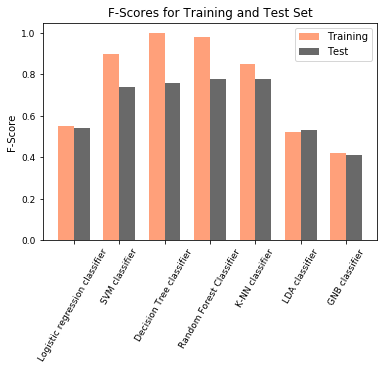

In [55]:
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=9) 
plt.rc('ytick', labelsize=9)

train=(0.55,0.90,1,0.98,0.85,0.52,0.42)
test=(0.54,0.74,0.76,0.78,0.78,0.53,0.41)

N=7 #number of algorithms

fig,ax=plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35
p1 = ax.bar(ind, train, width, color='lightsalmon', bottom=0)
p2 = ax.bar(ind + width, test, width, color='dimgray', bottom=0)

ax.set_title('F-Scores for Training and Test Set')
ax.set_xticks((ind + width / 2))
ax.set_xticklabels(('Logistic regression classifier', 'SVM classifier', 'Decision Tree classifier', 'Random Forest Classifier', 'K-NN classifier','LDA classifier','GNB classifier'))

for tick in ax.get_xticklabels():
    tick.set_rotation(60)

ax.legend((p1[0], p2[0]), ('Training', 'Test'))
ax.set_ylabel('F-Score')
ax.autoscale_view()

plt.show()

## Hyperparameter tuning of Support Vector Machine

In [38]:
from sklearn.model_selection import GridSearchCV
C=[1,1.2,1.4,2,2.5,3,4,5,6,10,20,30,40,500,300,400]
kernel=['linear',  'sigmoid','rbf']
gamma=['auto_deprecated','scale']
decision_function_shape=['ovo']
random_state=[42]

param_grid={
    'C':C,
    'kernel':kernel,
    'gamma':gamma,
    'decision_function_shape':decision_function_shape
}

from sklearn.svm import SVC
svc=SVC()
grid_search=GridSearchCV(svc,param_grid,cv=5, scoring='accuracy',verbose=2 )
grid_search.fit(X_train, y_train)
print("-----------------------------------------")
grid_search.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=1, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto_dep

[CV]  C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=1.2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1.4, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=1.4, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=1.4, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=1.4, decision_function_shape=ovo, gamma=auto_deprec

[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ...
[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf .......
[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf .......
[CV]  C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[

[CV]  C=3, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=3, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf 
[CV]  C=3, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=3, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf 
[CV]  C=3, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=3, decision_function_shape=ovo, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.0s
[CV] C=3, decision_function_shape=ovo, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.0s
[CV] C=3, decision_function_shape=ovo, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.0s
[CV] C=3, decision_function_shape=ovo, gamma=scale, kernel=linear ....
[CV]  C=3, decision_function_shape=ovo, gamma=scale, ke

[CV]  C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf 
[CV]  C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf 
[CV]  C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=5, decision_function_shape=ovo, gamma=auto_deprecated, kernel

[CV]  C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=10, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto

[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ..
[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ..
[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ..
[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, total=   0.0s
[CV] C=20, decision_function_shape=ovo, gamma=scale, kernel=rbf ......
[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=20, decision_function_shape=ovo, gamma=scale, kernel=rbf ......
[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=20, decision_function_shape=ovo, gamma=scale, kernel=rbf ......
[CV]  C=20, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0

[CV]  C=40, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=40, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf 
[CV]  C=40, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=40, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf 
[CV]  C=40, decision_function_shape=ovo, gamma=auto_deprecated, kernel=rbf, total=   0.0s
[CV] C=40, decision_function_shape=ovo, gamma=scale, kernel=linear ...
[CV]  C=40, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.0s
[CV] C=40, decision_function_shape=ovo, gamma=scale, kernel=linear ...
[CV]  C=40, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.1s
[CV] C=40, decision_function_shape=ovo, gamma=scale, kernel=linear ...
[CV]  C=40, decision_function_shape=ovo, gamma=scale, kernel=linear, total=   0.0s
[CV] C=40, decision_function_shape=ovo, gamma=scale, kernel=linear ...
[CV]  C=40, decision_function_shape=ovo, gamma=

[CV]  C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.6s
[CV] C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear 
[CV]  C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=linear, total=   0.6s
[CV] C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid 
[CV]  C=300, decision_function_shape=ovo, gamma=auto_deprecated, kernel=sigmoid, total=   0.0s
[CV] C=300, decision_function_sha

[CV]  C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=400, decision_function_shape=ovo, gamma=scale, kernel=rbf, total=   0.0s
-----------------------------------------


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   57.4s finished
C:\Users\medai\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 300,
 'decision_function_shape': 'ovo',
 'gamma': 'auto_deprecated',
 'kernel': 'rbf'}

In [ ]:
svc.get_params().keys()

In [43]:
from sklearn.svm import SVC
svmmodel=OneVsOneClassifier(SVC(C=500,random_state=42, kernel='rbf', gamma='auto_deprecated',decision_function_shape='ovo'))
svmmodel.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svmmodel.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svmmodel.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.71
Accuracy of SVM classifier on test set: 0.72


In [11]:
rfc.feature_importances_

array([0.28236148, 0.10703495, 0.04461443, 0.56598913])

[[74  7  2  6  0]
 [ 9 59  1  3  3]
 [ 4  0 64  6  4]
 [ 7  8  1 61  0]
 [ 5  2  4  0 24]]
                precision    recall  f1-score   support

       ParkLOS       0.75      0.83      0.79        89
      ParkNLOS       0.78      0.79      0.78        75
RESIDENTIAL_OD       0.89      0.82      0.85        78
      TrackLOS       0.80      0.79      0.80        77
     TrackNLOS       0.77      0.69      0.73        35

     micro avg       0.80      0.80      0.80       354
     macro avg       0.80      0.78      0.79       354
  weighted avg       0.80      0.80      0.80       354



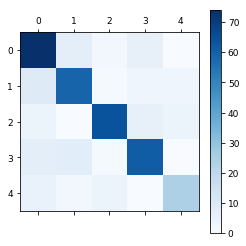

## Hyperparameter tuning of Gradient Boosting

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    
    {'n_estimators':[10,20,30,40,50,60,100,300,400,500,600,700,1000], 'criterion': ['friedman_mse'], 'random_state':[42]},
    {'n_estimators':[10,20,30,40,50,60,100,300,400], 'criterion': ['friedman_mse'], 'random_state':[42],'max_features':[1,2,3,4]},
    {'n_estimators':[10,20,30,40,50,60,100,300,400], 'criterion': ['friedman_mse'], 'random_state':[42],'max_features':['sqrt','auto','log2']}
]
from sklearn.ensemble import RandomForestClassifier
gbc= GradientBoostingClassifier()
grid_search=GridSearchCV(gbc,param_grid,cv=4, scoring='accuracy' )
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_features': 2,
 'n_estimators': 400,
 'random_state': 42}

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 1000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5,6,7,8,9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4, 5,6,7,8,9, 10]
# Method of selecting samples for training each tree
learning_rate= [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 50)]
criterion= ['friedman_mse']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion': criterion,
               'learning_rate':learning_rate,
              'random_state':[42]}

gbc= GradientBoostingClassifier()
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42)
# Fit the random search model
gbc_random.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   1.5s
[CV] random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   1.4s
[CV] random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   1.5s
[CV] random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   1.5s
[CV] random_state=42, n_estimators=81, min_samples_split=3, min_samples_leaf=7, max_featur

[CV]  random_state=42, n_estimators=85, min_samples_split=8, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.08383673469387756, criterion=friedman_mse, total=   2.0s
[CV] random_state=42, n_estimators=1844, min_samples_split=6, min_samples_leaf=7, max_features=sqrt, max_depth=10, learning_rate=0.02322448979591837, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1844, min_samples_split=6, min_samples_leaf=7, max_features=sqrt, max_depth=10, learning_rate=0.02322448979591837, criterion=friedman_mse, total=  14.7s
[CV] random_state=42, n_estimators=1844, min_samples_split=6, min_samples_leaf=7, max_features=sqrt, max_depth=10, learning_rate=0.02322448979591837, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1844, min_samples_split=6, min_samples_leaf=7, max_features=sqrt, max_depth=10, learning_rate=0.02322448979591837, criterion=friedman_mse, total=  15.2s
[CV] random_state=42, n_estimators=1844, min_samples_split=6, min_samples_leaf=7, max_f

[CV]  random_state=42, n_estimators=591, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   6.3s
[CV] random_state=42, n_estimators=591, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, learning_rate=0.05757142857142858, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=591, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=20, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   6.0s
[CV] random_state=42, n_estimators=772, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.047469387755102045, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=772, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.047469387755102045, criterion=friedman_mse, total=   7.8s
[CV] random_state=42, n_estimators=772, min_samples_split=5, min_samples_leaf=7, max_fea

[CV]  random_state=42, n_estimators=474, min_samples_split=7, min_samples_leaf=7, max_features=sqrt, max_depth=None, learning_rate=0.08585714285714287, criterion=friedman_mse, total=   4.2s
[CV] random_state=42, n_estimators=474, min_samples_split=7, min_samples_leaf=7, max_features=sqrt, max_depth=None, learning_rate=0.08585714285714287, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=474, min_samples_split=7, min_samples_leaf=7, max_features=sqrt, max_depth=None, learning_rate=0.08585714285714287, criterion=friedman_mse, total=   4.4s
[CV] random_state=42, n_estimators=474, min_samples_split=7, min_samples_leaf=7, max_features=sqrt, max_depth=None, learning_rate=0.08585714285714287, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=474, min_samples_split=7, min_samples_leaf=7, max_features=sqrt, max_depth=None, learning_rate=0.08585714285714287, criterion=friedman_mse, total=   4.1s
[CV] random_state=42, n_estimators=474, min_samples_split=7, min_samples_leaf=7,

[CV]  random_state=42, n_estimators=354, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=None, learning_rate=0.0656530612244898, criterion=friedman_mse, total=   4.8s
[CV] random_state=42, n_estimators=1541, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=10, learning_rate=0.0030204081632653063, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1541, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=10, learning_rate=0.0030204081632653063, criterion=friedman_mse, total=  24.4s
[CV] random_state=42, n_estimators=1541, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=10, learning_rate=0.0030204081632653063, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1541, min_samples_split=7, min_samples_leaf=2, max_features=sqrt, max_depth=10, learning_rate=0.0030204081632653063, criterion=friedman_mse, total=  25.4s
[CV] random_state=42, n_estimators=1541, min_samples_split=7, min_samples_lea

[CV]  random_state=42, n_estimators=731, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=110, learning_rate=0.0656530612244898, criterion=friedman_mse, total=   4.8s
[CV] random_state=42, n_estimators=731, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=110, learning_rate=0.0656530612244898, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=731, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=110, learning_rate=0.0656530612244898, criterion=friedman_mse, total=   4.8s
[CV] random_state=42, n_estimators=731, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=110, learning_rate=0.0656530612244898, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=731, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=110, learning_rate=0.0656530612244898, criterion=friedman_mse, total=   5.1s
[CV] random_state=42, n_estimators=181, min_samples_split=3, min_samples_leaf=5, max_

[CV]  random_state=42, n_estimators=450, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=40, learning_rate=0.07575510204081633, criterion=friedman_mse, total=   4.0s
[CV] random_state=42, n_estimators=450, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=40, learning_rate=0.07575510204081633, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=450, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=40, learning_rate=0.07575510204081633, criterion=friedman_mse, total=   3.8s
[CV] random_state=42, n_estimators=450, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=40, learning_rate=0.07575510204081633, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=450, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=40, learning_rate=0.07575510204081633, criterion=friedman_mse, total=   3.8s
[CV] random_state=42, n_estimators=450, min_samples_split=10, min_samples_leaf=3, max

[CV]  random_state=42, n_estimators=882, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=110, learning_rate=0.03736734693877551, criterion=friedman_mse, total=   7.4s
[CV] random_state=42, n_estimators=882, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=110, learning_rate=0.03736734693877551, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=882, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=110, learning_rate=0.03736734693877551, criterion=friedman_mse, total=   7.8s
[CV] random_state=42, n_estimators=231, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=80, learning_rate=0.07979591836734694, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=231, min_samples_split=9, min_samples_leaf=6, max_features=log2, max_depth=80, learning_rate=0.07979591836734694, criterion=friedman_mse, total=   3.0s
[CV] random_state=42, n_estimators=231, min_samples_split=9, min_samples_leaf=6, max

[CV]  random_state=42, n_estimators=1127, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   8.0s
[CV] random_state=42, n_estimators=1127, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.035346938775510206, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1127, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   7.7s
[CV] random_state=42, n_estimators=1127, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.035346938775510206, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1127, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.035346938775510206, criterion=friedman_mse, total=   8.1s
[CV] random_state=42, n_estimators=1127, min_samples_split=4, min_samples_leaf=1

[CV]  random_state=42, n_estimators=721, min_samples_split=3, min_samples_leaf=7, max_features=sqrt, max_depth=10, learning_rate=0.0030204081632653063, criterion=friedman_mse, total=   8.7s
[CV] random_state=42, n_estimators=1111, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=100, learning_rate=0.02726530612244898, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1111, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=100, learning_rate=0.02726530612244898, criterion=friedman_mse, total=   9.8s
[CV] random_state=42, n_estimators=1111, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=100, learning_rate=0.02726530612244898, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1111, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=100, learning_rate=0.02726530612244898, criterion=friedman_mse, total=   9.0s
[CV] random_state=42, n_estimators=1111, min_samples_split=10, min_samples_l

[CV]  random_state=42, n_estimators=1952, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=60, learning_rate=0.05555102040816327, criterion=friedman_mse, total=   9.9s
[CV] random_state=42, n_estimators=1952, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=60, learning_rate=0.05555102040816327, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1952, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=60, learning_rate=0.05555102040816327, criterion=friedman_mse, total=   9.5s
[CV] random_state=42, n_estimators=1952, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=60, learning_rate=0.05555102040816327, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1952, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=60, learning_rate=0.05555102040816327, criterion=friedman_mse, total=  10.0s
[CV] random_state=42, n_estimators=1169, min_samples_split=9, min_samples_leaf=1

[CV]  random_state=42, n_estimators=1936, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.1, criterion=friedman_mse, total=   7.0s
[CV] random_state=42, n_estimators=1936, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.1, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1936, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.1, criterion=friedman_mse, total=   7.1s
[CV] random_state=42, n_estimators=1936, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.1, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1936, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.1, criterion=friedman_mse, total=   7.1s
[CV] random_state=42, n_estimators=1936, min_samples_split=4, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.1, criterion=friedman_mse 
[CV]  r

[CV]  random_state=42, n_estimators=478, min_samples_split=8, min_samples_leaf=2, max_features=log2, max_depth=110, learning_rate=0.013122448979591837, criterion=friedman_mse, total=  13.3s
[CV] random_state=42, n_estimators=1133, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=70, learning_rate=0.08383673469387756, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1133, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=70, learning_rate=0.08383673469387756, criterion=friedman_mse, total=   5.4s
[CV] random_state=42, n_estimators=1133, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=70, learning_rate=0.08383673469387756, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1133, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=70, learning_rate=0.08383673469387756, criterion=friedman_mse, total=   5.3s
[CV] random_state=42, n_estimators=1133, min_samples_split=4, min_samples_leaf=4, ma

[CV]  random_state=42, n_estimators=175, min_samples_split=10, min_samples_leaf=8, max_features=log2, max_depth=30, learning_rate=0.0333265306122449, criterion=friedman_mse, total=   2.5s
[CV] random_state=42, n_estimators=175, min_samples_split=10, min_samples_leaf=8, max_features=log2, max_depth=30, learning_rate=0.0333265306122449, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=175, min_samples_split=10, min_samples_leaf=8, max_features=log2, max_depth=30, learning_rate=0.0333265306122449, criterion=friedman_mse, total=   2.5s
[CV] random_state=42, n_estimators=175, min_samples_split=10, min_samples_leaf=8, max_features=log2, max_depth=30, learning_rate=0.0333265306122449, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=175, min_samples_split=10, min_samples_leaf=8, max_features=log2, max_depth=30, learning_rate=0.0333265306122449, criterion=friedman_mse, total=   2.6s
[CV] random_state=42, n_estimators=760, min_samples_split=10, min_samples_leaf=4, max_feat

[CV]  random_state=42, n_estimators=1312, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.03736734693877551, criterion=friedman_mse, total=   8.2s
[CV] random_state=42, n_estimators=1312, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.03736734693877551, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1312, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.03736734693877551, criterion=friedman_mse, total=   8.1s
[CV] random_state=42, n_estimators=1312, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.03736734693877551, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1312, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.03736734693877551, criterion=friedman_mse, total=   8.2s
[CV] random_state=42, n_estimators=1312, min_samples_split=6, min_samples_leaf=1, max

[CV]  random_state=42, n_estimators=988, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.05555102040816327, criterion=friedman_mse, total=   7.1s
[CV] random_state=42, n_estimators=988, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.05555102040816327, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=988, min_samples_split=6, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.05555102040816327, criterion=friedman_mse, total=   7.2s
[CV] random_state=42, n_estimators=1183, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.0636326530612245, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1183, min_samples_split=8, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.0636326530612245, criterion=friedman_mse, total=   7.0s
[CV] random_state=42, n_estimators=1183, min_samples_split=8, min_samples_leaf=7, max_feat

[CV]  random_state=42, n_estimators=792, min_samples_split=3, min_samples_leaf=9, max_features=sqrt, max_depth=40, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   7.0s
[CV] random_state=42, n_estimators=792, min_samples_split=3, min_samples_leaf=9, max_features=sqrt, max_depth=40, learning_rate=0.05757142857142858, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=792, min_samples_split=3, min_samples_leaf=9, max_features=sqrt, max_depth=40, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   7.1s
[CV] random_state=42, n_estimators=792, min_samples_split=3, min_samples_leaf=9, max_features=sqrt, max_depth=40, learning_rate=0.05757142857142858, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=792, min_samples_split=3, min_samples_leaf=9, max_features=sqrt, max_depth=40, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   6.7s
[CV] random_state=42, n_estimators=792, min_samples_split=3, min_samples_leaf=9, max_featu

[CV]  random_state=42, n_estimators=1434, min_samples_split=6, min_samples_leaf=3, max_features=auto, max_depth=10, learning_rate=0.08383673469387756, criterion=friedman_mse, total=   6.0s
[CV] random_state=42, n_estimators=1292, min_samples_split=4, min_samples_leaf=8, max_features=sqrt, max_depth=60, learning_rate=0.06969387755102041, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1292, min_samples_split=4, min_samples_leaf=8, max_features=sqrt, max_depth=60, learning_rate=0.06969387755102041, criterion=friedman_mse, total=   6.8s
[CV] random_state=42, n_estimators=1292, min_samples_split=4, min_samples_leaf=8, max_features=sqrt, max_depth=60, learning_rate=0.06969387755102041, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1292, min_samples_split=4, min_samples_leaf=8, max_features=sqrt, max_depth=60, learning_rate=0.06969387755102041, criterion=friedman_mse, total=   7.1s
[CV] random_state=42, n_estimators=1292, min_samples_split=4, min_samples_leaf=8, max

[CV]  random_state=42, n_estimators=1139, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=60, learning_rate=0.059591836734693884, criterion=friedman_mse, total=   7.2s
[CV] random_state=42, n_estimators=1139, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=60, learning_rate=0.059591836734693884, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1139, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=60, learning_rate=0.059591836734693884, criterion=friedman_mse, total=   6.9s
[CV] random_state=42, n_estimators=1139, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=60, learning_rate=0.059591836734693884, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1139, min_samples_split=7, min_samples_leaf=6, max_features=log2, max_depth=60, learning_rate=0.059591836734693884, criterion=friedman_mse, total=   7.8s
[CV] random_state=42, n_estimators=934, min_samples_split=9, min_samples_leaf=8,

[CV]  random_state=42, n_estimators=492, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, learning_rate=0.007061224489795919, criterion=friedman_mse, total=  14.6s
[CV] random_state=42, n_estimators=492, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, learning_rate=0.007061224489795919, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=492, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, learning_rate=0.007061224489795919, criterion=friedman_mse, total=  14.9s
[CV] random_state=42, n_estimators=492, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, learning_rate=0.007061224489795919, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=492, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, learning_rate=0.007061224489795919, criterion=friedman_mse, total=  15.4s
[CV] random_state=42, n_estimators=492, min_samples_split=4, min_samples_le

[CV]  random_state=42, n_estimators=854, min_samples_split=7, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   5.1s
[CV] random_state=42, n_estimators=854, min_samples_split=7, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.05757142857142858, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=854, min_samples_split=7, min_samples_leaf=1, max_features=sqrt, max_depth=30, learning_rate=0.05757142857142858, criterion=friedman_mse, total=   5.8s
[CV] random_state=42, n_estimators=1754, min_samples_split=4, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.031306122448979595, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1754, min_samples_split=4, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.031306122448979595, criterion=friedman_mse, total=  13.1s
[CV] random_state=42, n_estimators=1754, min_samples_split=4, min_samples_leaf=10, m

[CV]  random_state=42, n_estimators=1828, min_samples_split=9, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.04948979591836735, criterion=friedman_mse, total=  10.6s
[CV] random_state=42, n_estimators=1828, min_samples_split=9, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.04948979591836735, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1828, min_samples_split=9, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.04948979591836735, criterion=friedman_mse, total=  10.9s
[CV] random_state=42, n_estimators=1828, min_samples_split=9, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.04948979591836735, criterion=friedman_mse 
[CV]  random_state=42, n_estimators=1828, min_samples_split=9, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.04948979591836735, criterion=friedman_mse, total=  10.4s
[CV] random_state=42, n_estimators=1828, min_samples_split=9, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 68.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131...6734693878, 0.09393877551020409, 0.0959591836734694, 0.0979795918367347, 0.1], 'random_state': [42]},
          pre_dispatch='2*n_jobs', random_state=

In [73]:
gbc_random.best_params_

{'random_state': 42,
 'n_estimators': 770,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 80,
 'learning_rate': 0.03736734693877551,
 'criterion': 'friedman_mse'}

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.01,random_state=42,max_features='log2',subsample=0.90, min_samples_split=2,min_samples_leaf=10,max_depth=60,n_estimators=700,criterion='friedman_mse').fit(X_train, y_train)
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of Gradient Boosting classifier on training set: 0.99
Accuracy of Gradient Boosting classifier on test set: 0.79


[[73  5  2  8  1]
 [ 7 60  1  4  3]
 [ 3  0 66  5  4]
 [ 8 11  2 56  0]
 [ 5  1  6  0 23]]
                precision    recall  f1-score   support

       ParkLOS       0.76      0.82      0.79        89
      ParkNLOS       0.78      0.80      0.79        75
RESIDENTIAL_OD       0.86      0.85      0.85        78
      TrackLOS       0.77      0.73      0.75        77
     TrackNLOS       0.74      0.66      0.70        35

     micro avg       0.79      0.79      0.79       354
     macro avg       0.78      0.77      0.77       354
  weighted avg       0.79      0.79      0.78       354



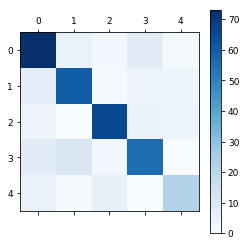

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gbc.predict(X_test)
matrix=confusion_matrix(y_test, pred)
report=classification_report(y_test, pred)
print(matrix)
print(report)
#tick_marks = np.arange(len(rfc.classes_))
#plt.xticks(tick_marks, rfc.classes_, rotation=45)
#plt.yticks(tick_marks, rfc.classes_)
plt.matshow(matrix,cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [82]:
gbc.classes_

array(['ParkLOS', 'ParkNLOS', 'RESIDENTIAL_OD', 'TrackLOS', 'TrackNLOS'],
      dtype=object)

## Hyperparameter tuning of Random Forest

In [46]:

from sklearn.model_selection import GridSearchCV
param_grid=[
    
    {'n_estimators':[10,20,30,40,50,60,100,300,400,500,600,700,1000], 'criterion': ['gini', 'entropy'],'bootstrap':[True, False], 'random_state':[42]},
    {'n_estimators':[10,20,30,40,50,60,100,300,400], 'criterion': ['gini', 'entropy'],'bootstrap':[True, False], 'random_state':[42],'max_features':[1,2,3,4]},
    {'n_estimators':[10,20,30,40,50,60,100,300,400], 'criterion': ['gini', 'entropy'],'bootstrap':[True, False], 'random_state':[42],'max_features':['sqrt','auto','log2']}
]
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
grid_search=GridSearchCV(rfc,param_grid,cv=2, scoring='accuracy' )
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'n_estimators': 50,
 'random_state': 42}

In [87]:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion= ['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion,
              'random_state':[42]}
print(random_grid)


rfc= RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 6, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'random_state': [42]}
Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   2.4s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   2.3s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   2.3s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   2.3s
[CV] random_state=42, n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=200, min_sam

[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, bootstrap=False, total=   3.5s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, bootstrap=False, total=   3.6s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, bootstrap=False, total=   3.5s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1600, min_sam

[CV]  random_state=42, n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   2.7s
[CV] random_state=42, n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   2.8s
[CV] random_state=42, n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, bootstrap=False, total=   2.1s
[CV] random_state=42, n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=1600, min_samples_split=1

[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True, total=   1.3s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True, total=   1.2s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True, total=   1.2s
[CV] random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=600, min_samples_split=5, min

[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   3.5s
[CV] random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   3.7s
[CV] random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   3.5s
[CV] random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1800, min_sam

[CV]  random_state=42, n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   3.9s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=False, total=   2.4s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=False, total=   2.5s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimator

[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True, total=   1.7s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True, total=   1.7s
[CV] random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True, total=   1.8s
[CV] random_state=42, n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=800, min_samp

[CV]  random_state=42, n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=gini, bootstrap=True, total=   0.1s
[CV] random_state=42, n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=gini, bootstrap=True, total=   0.1s
[CV] random_state=42, n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=gini, bootstrap=True, total=   0.1s
[CV] random_state=42, n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=110, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=200, min_samples_split=10, min_

[CV]  random_state=42, n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, criterion=entropy, bootstrap=False, total=   1.6s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=True, total=   3.0s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=True, total=   2.9s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1600, mi

[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False, total=   2.7s
[CV] random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False, total=   2.7s
[CV] random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False, total=   2.7s
[CV] random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=600, min_samples_split=5, min_sa

[CV]  random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, criterion=entropy, bootstrap=True, total=   1.9s
[CV] random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, criterion=entropy, bootstrap=True, total=   1.9s
[CV] random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, criterion=entropy, bootstrap=True, total=   1.9s
[CV] random_state=42, n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1200, min_samples_s

[CV]  random_state=42, n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=entropy, bootstrap=False, total=   0.7s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=True, total=   2.6s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=True, total=   2.6s
[CV] random_state=42, n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=True 
[CV]  random_state=42, n_estimators=1600, min_samples

[CV]  random_state=42, n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, criterion=gini, bootstrap=False, total=   0.5s
[CV] random_state=42, n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, criterion=gini, bootstrap=False, total=   0.5s
[CV] random_state=42, n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, criterion=gini, bootstrap=False, total=   0.5s
[CV] random_state=42, n_estimators=1800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=1800, min_samples_split=5, min

[CV]  random_state=42, n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True, total=   2.0s
[CV] random_state=42, n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=gini, bootstrap=True, total=   0.6s
[CV] random_state=42, n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=gini, bootstrap=True, total=   0.6s
[CV] random_state=42, n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=gini, bootstrap=True 
[CV]  random_state=42, n_estimators=600, min_samples_split=10, mi

[CV]  random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, criterion=gini, bootstrap=False, total=   0.7s
[CV] random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, criterion=gini, bootstrap=False 
[CV]  random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, criterion=gini, bootstrap=False, total=   0.7s
[CV] random_state=42, n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.7s
[CV] random_state=42, n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 
[CV]  random_state=42, n_estimators=400, min_samples_split=2, mi

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 14.1min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'random_state': [42]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          

In [88]:
rf_random.best_params_

{'random_state': 42,
 'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': True}

using CV of 3={'random_state': 42,
 'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'criterion': 'entropy',
 'bootstrap': True}
 
 using CV of 5={'random_state': 42,
 'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'criterion': 'entropy',
 'bootstrap': True}

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=True,criterion='gini',random_state=42)
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest Classifier classifier on training set: 0.95
Accuracy of Random Forest Classifier classifier on test set: 0.80


In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=50, bootstrap=True,criterion='entropy',random_state=42)
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest Classifier classifier on training set: 1.00
Accuracy of Random Forest Classifier classifier on test set: 0.79


In [204]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=900,random_state=42,min_samples_split=5, min_samples_leaf=1, max_features="auto", max_depth=90, bootstrap=True,criterion='entropy' )
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))


Accuracy of Random Forest Classifier classifier on training set: 0.95
Accuracy of Random Forest Classifier classifier on test set: 0.81


In [12]:
class_names=rfc.classes_



[[74  8  1  6  0]
 [ 7 61  1  3  3]
 [ 4  0 64  6  4]
 [ 7  7  1 62  0]
 [ 5  1  4  0 25]]
                precision    recall  f1-score   support

       ParkLOS       0.76      0.83      0.80        89
      ParkNLOS       0.79      0.81      0.80        75
RESIDENTIAL_OD       0.90      0.82      0.86        78
      TrackLOS       0.81      0.81      0.81        77
     TrackNLOS       0.78      0.71      0.75        35

     micro avg       0.81      0.81      0.81       354
     macro avg       0.81      0.80      0.80       354
  weighted avg       0.81      0.81      0.81       354



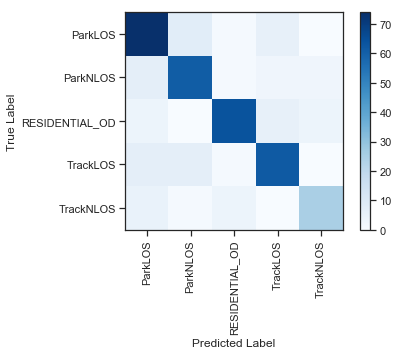

In [206]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = rfc.predict(X_test)
matrix=confusion_matrix(y_test, pred)
report=classification_report(y_test, pred)
print(matrix)
print(report)
tick_marks = np.arange(len(rfc.classes_))
plt.xticks(tick_marks, rfc.classes_, rotation=90)
plt.yticks(tick_marks, rfc.classes_)
plt.imshow(matrix,interpolation='nearest',cmap=plt.cm.Blues)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.colorbar()
plt.show()

Confusion matrix, without normalization
[[74  8  1  6  0]
 [ 7 61  1  3  3]
 [ 4  0 64  6  4]
 [ 7  7  1 62  0]
 [ 5  1  4  0 25]]


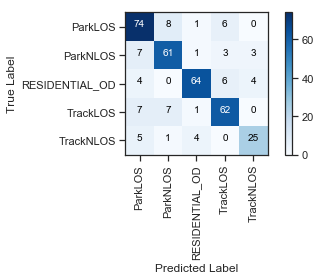

In [207]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

matrix=confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plot_confusion_matrix(matrix, classes=rfc.classes_, title='')

In [187]:
output['True']=y_test
output['Area']=rfc.predict(X_test)
output.to_excel('testdata.xlsx')
output.head()

,RSSI,SQ,ETX,Distance,Throughput,True,Area
670,43,77,1.111111,55.46250,5.609378,ParkNLOS,ParkNLOS
819,92,100,1.000000,5.82660,10.946049,TrackLOS,ParkNLOS
143,60,100,1.000000,22.27752,14.889447,ParkLOS,RESIDENTIAL_OD
521,53,99,1.000000,23.05500,6.241580,ParkNLOS,ParkNLOS
1740,46,80,1.111111,115.93750,5.361592,RESIDENTIAL_OD,RESIDENTIAL_OD


## Hyperparameter tuning for Decision Tree

In [211]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    
    { 'criterion': ['gini', 'entropy'],'random_state':[42]},
    { 'criterion': ['gini', 'entropy'],'random_state':[42],'max_features':[1,2,3,4]},
    { 'criterion': ['gini', 'entropy'], 'random_state':[42],'max_features':['sqrt','auto','log2']}
]
from sklearn.tree import DecisionTreeClassifier
rfc= DecisionTreeClassifier()
grid_search=GridSearchCV(rfc,param_grid,cv=2, scoring='accuracy' )
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'random_state': 42}

In [229]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,criterion="entropy",max_features=4, min_impurity_decrease=0.001).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.77



## Hyperparameter tuning for KNN

In [47]:
from sklearn.model_selection import GridSearchCV

n_neighbors=[5,10,50,100,200,300,1000]
algorithm=['auto']
weights=['uniform','distance']
p = [1,2]

param_grid= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'p':p
}

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5, scoring='accuracy' )
grid_search.fit(X_train, y_train)
print("-----------------------------")
grid_search.best_params_


-----------------------------


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4, p=1 , weights='uniform')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.76


In [191]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 7 columns):
Area          1769 non-null object
RSSI          1769 non-null int64
SQ            1769 non-null int64
ETX           1769 non-null float64
Distance      1769 non-null float64
Throughput    1769 non-null float64
TPR           1769 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 96.8+ KB


# Training the second model

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
feature=['Area','RSSI','SQ','ETX','Distance']


#Getting the maximum throughput in order to calculate TPR
maximum=output_train.groupby(['Area'])['Throughput'].max()


#convert throughput to TPR for Train data
output_train['TPR']=0
output_train.loc[output_train.Area=='ParkLOS', ['TPR']]=output_train['Throughput']/maximum.ParkLOS
output_train.loc[output_train.Area=='ParkNLOS', ['TPR']]=output_train['Throughput']/maximum.ParkNLOS
output_train.loc[output_train.Area=='RESIDENTIAL_OD', ['TPR']]=output_train['Throughput']/maximum.RESIDENTIAL_OD
output_train.loc[output_train.Area=='TrackLOS', ['TPR']]=output_train['Throughput']/maximum.TrackLOS
output_train.loc[output_train.Area=='TrackNLOS', ['TPR']]=output_train['Throughput']/maximum.TrackNLOS

output_train.info()



#convert throughput to TPR for Test data
output['TPR']=0
output['Area']=rfc.predict(X_test)
output.info()
output.loc[output.Area=='ParkLOS', ['TPR']]=output['Throughput']/maximum.ParkLOS
output.loc[output.Area=='ParkNLOS', ['TPR']]=output['Throughput']/maximum.ParkNLOS
output.loc[output.Area=='RESIDENTIAL_OD', ['TPR']]=output['Throughput']/maximum.RESIDENTIAL_OD

output.loc[output.Area=='TrackLOS', ['TPR']]=output['Throughput']/maximum.TrackLOS
output.loc[output.Area=='TrackNLOS', ['TPR']]=output['Throughput']/maximum.TrackNLOS

output.info()

# converting the catergorical data to one hot encoding
#X_train_transform = pd.get_dummies(X)

#splitting data to train and test data
XX_train=output_train[feature]
yy_train=output_train['TPR']

XX_test=output[feature]
yy_test=output['TPR']


yy_train.describe()

XX_train=pd.get_dummies(XX_train)
XX_test=pd.get_dummies(XX_test)

#Linear Regression
lr=LinearRegression(fit_intercept=False)
lr.fit(XX_train,yy_train)


print("MAE Train "+ str(mean_absolute_error(yy_train,lr.predict(XX_train))))
print("MAE Test "+ str(mean_absolute_error(yy_test,lr.predict(XX_test))))

print("MSE Train "+ str(mean_squared_error(yy_train,lr.predict(XX_train))))
print("MSE Test "+ str(mean_squared_error(yy_test,lr.predict(XX_test))))

from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,XX_train,yy_train, scoring='neg_mean_absolute_error',cv=4)
print(score*-1)
rms=np.sqrt(-score)
print(rms)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 318 to 1544
Data columns (total 7 columns):
RSSI          1415 non-null int64
SQ            1415 non-null int64
ETX           1415 non-null float64
Distance      1415 non-null float64
Throughput    1415 non-null float64
Area          1415 non-null object
TPR           1415 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 128.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 670 to 1213
Data columns (total 8 columns):
RSSI          354 non-null int64
SQ            354 non-null int64
ETX           354 non-null float64
Distance      354 non-null float64
Throughput    354 non-null float64
True          354 non-null object
Area          354 non-null object
TPR           354 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 34.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 670 to 1213
Data columns (total 8 columns):
RSSI          354 non-null int64

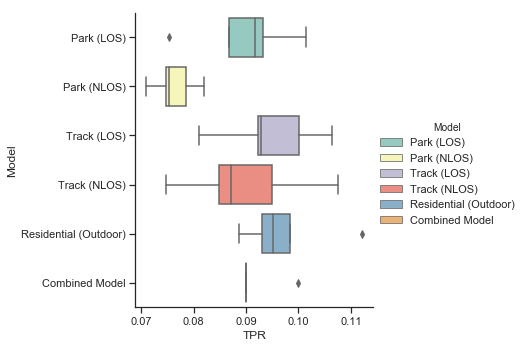

In [15]:
%matplotlib inline
datapath= r'mae.xlsx'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_raw=pd.read_excel(datapath)
data_raw.head()
data_raw.describe()



import seaborn as sns
sns.set(style="ticks", color_codes=True)

ax = sns.catplot(y="Model", x="TPR", data=data_raw, palette="Set3",hue='Model',dodge=False,kind='box',orient="h", legend_out=True, aspect=1.2)
ax.savefig("output.png")
